In [25]:
# 데이터 처리
from __future__ import print_function
from IPython.display import display, HTML
import numpy as np
import pandas as pd
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
#dummy
from sklearn.dummy import DummyClassifier
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# scikit-learn 
# 정규화
from sklearn.preprocessing import StandardScaler
# 학습, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 혼동 행렬 및 정확도, f1 계산하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [26]:
#####Universal bank 데이터 변수설명: 변수명	변수설명	변수속성
#Age	완성 된 연도의 고객의 연령	연속형
#Experienc	수년간의 전문적인 경험	연속형
#Incom	고객의 연간 수입	연속형
#Family	고객의 가족 규모	연속형
#CCAvg	평균 신용 카드 지출	연속형
#Education	교육 수준 (1 : Undergrad , 2 : 대학원, 3 : 고급 / 전문)	범주형
#Mortgag	주택 모기지의 가치	연속형
#PersonalLoan	고객은 마지막 캠페인에 제공된 개인 대출을 수락 하였나? (목표 변수)	범주형
#SecuritiesAccount	고객은 은행에 증권 계좌를 가지고 있는가?	범주형
#CDAccount	고객은 은행에 예금 계좌를 가지고 있는가?	범주형
#Online	고객이 인터넷 뱅킹 시설을 사용하는가?	범주형
#CreditCard	고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가?	범주형

In [27]:
# 데이터 불러오기
dat_dir = 'C:/Users/user/Desktop/AI_Project/[classification]loan_use/'
dat = pd.read_csv(dat_dir+'loan_data.csv')
#dat = pd.read_csv(dat_dir+'loan_data.csv',nrows=1000)



# 데이터 예시 확인
#dat.head(20) 
dat.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,0,3990.0,0,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,0,160.0,0,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,0,260.0,0,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990.0,0,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,0,160.0,0,2.11,10,900,0,0,1,F,B,B,0


In [28]:
### https://3months.tistory.com/28  참조 

#### 데이터 3가지 dummy data 처리 
#dat_dummy = DummyClassifier(strategy='stratified')
#print(dat_dummy)


dummy_Sex = pd.get_dummies(dat['SEX'], prefix='Sex')
dummy_PayMethod = pd.get_dummies(dat['PAY_METHOD'], prefix='PayMethod')
dummy_Job = pd.get_dummies(dat['JOB'], prefix='Job')




In [29]:
# 더미를 데이터에 이어 붙인다.
#data_dummy = dat[cols_to_keep].join(dummy_Pclass.ix[:,'Pclass_2':]) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함

data_dummy = dat.join(dummy_Sex) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함
data_dummy = data_dummy.join(dummy_PayMethod) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함
data_dummy = data_dummy.join(dummy_Job) # Pclass_2 부터 이어 붙임. 이래야 분석에 편리함


#컬럼 다보이기 


pd.set_option('display.max_columns', None)



#data_dummy = dat.join(dummy_Sex.ix[:,'Sex_male':]) # Sex_male만 이어 붙임
 
#data['intercept'] = 1.0
 
# 지금까지의 데이터 확인
 #data_dummy.head()
data_dummy.head()
data_dummy.columns

#dummy 처리한 데이터 삭제

#data= data_dummy.drop(data_dummy.columns[[19, 21]],axis=1,inplace=True)
##data=data_dummy
#data.columns
#data.head()
#x,y = data.drop('TARGET', axis=1), dat['TARGET']

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET', 'Sex_F', 'Sex_M', 'PayMethod_A',
       'PayMethod_B', 'PayMethod_C', 'PayMethod_D', 'Job_A', 'Job_B', 'Job_C',
       'Job_D'],
      dtype='object')

In [30]:
data= data_dummy.drop(data_dummy.columns[[19,20, 21]],axis=1,inplace=True)
data = data_dummy
data.columns


Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'TARGET', 'Sex_F',
       'Sex_M', 'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D',
       'Job_A', 'Job_B', 'Job_C', 'Job_D'],
      dtype='object')

In [31]:
check_missing = lambda x: x.isnull().sum()
data.apply(check_missing)

AGE              0
TOT_LOAN         0
TOT_LOAN_CRD     0
LOAN_BNK         0
LOAN_CPT         0
CRDT_CNT         0
GUARN_CNT        0
INCOME           0
LOAN_CRD_CNT     0
LATE_RATE        0
LATE_RATE_1Y     0
INS_MON_MAX      0
CANCEL_CNT_1Y    0
CALL_TIME        0
TEL_COST_MON     0
MOBILE_PRICE     0
SUSP_DAY         0
LATE_TEL         0
COMB_COMM        0
TARGET           0
Sex_F            0
Sex_M            0
PayMethod_A      0
PayMethod_B      0
PayMethod_C      0
PayMethod_D      0
Job_A            0
Job_B            0
Job_C            0
Job_D            0
dtype: int64

In [32]:
#x,y = data.drop('TARGET', axis=1), dat['TARGET']

In [33]:
data_temp=data
data.shape

(43386, 30)

In [34]:
dat_processing_norm = preprocessing.minmax_scale(data_temp)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = data_temp.columns

In [35]:
dat_processed.shape

(43386, 30)

In [36]:
dat_processed

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET,Sex_F,Sex_M,PayMethod_A,PayMethod_B,PayMethod_C,PayMethod_D,Job_A,Job_B,Job_C,Job_D
0,0.4,0.006036,0.006036,0.006356,0.000000,0.000000,0.0,0.45,0.000000,0.16,0.0,0.399,0.0,0.001000,0.126316,0.416667,0.000000,0.100000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.3,0.009054,0.009054,0.000000,0.000000,0.090909,0.0,0.37,0.000000,0.09,0.0,0.016,0.0,0.001408,0.105263,0.666667,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.7,0.009054,0.009054,0.000000,0.000000,0.000000,0.0,0.64,0.000000,0.01,0.0,0.026,0.0,0.000329,0.052632,0.583333,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.7,0.042254,0.000000,0.044492,0.000000,0.454545,0.0,0.89,0.000000,0.13,0.3,0.199,0.0,0.001717,0.084211,0.750000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.4,0.036217,0.036217,0.038136,0.000000,0.272727,0.1,0.00,0.000000,0.02,0.0,0.016,0.0,0.001388,0.010526,0.750000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.5,0.141851,0.018109,0.111229,0.109635,0.636364,0.0,0.00,0.000000,0.11,0.0,0.012,0.0,0.001000,0.084211,0.666667,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.5,0.350101,0.000000,0.000000,0.000000,0.272727,0.0,0.79,0.000000,0.03,0.0,0.299,0.0,0.000454,0.126316,0.750000,0.000370,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.3,0.123742,0.123742,0.000000,0.000000,0.272727,0.0,0.39,0.000000,0.00,0.0,0.012,0.0,0.002145,0.084211,0.750000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.4,0.202213,0.024145,0.212924,0.000000,0.363636,0.0,0.00,0.000000,0.11,0.0,0.034,0.0,0.001033,0.063158,0.416667,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.3,0.075453,0.075453,0.079449,0.000000,0.181818,0.0,0.44,0.000000,0.06,0.1,0.034,0.0,0.005224,0.105263,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
dat_processed.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'TARGET', 'Sex_F',
       'Sex_M', 'PayMethod_A', 'PayMethod_B', 'PayMethod_C', 'PayMethod_D',
       'Job_A', 'Job_B', 'Job_C', 'Job_D'],
      dtype='object')

In [38]:
x_columns=dat_processed.columns.difference(["TARGET"])

In [39]:
# X와 y 데이터 나누기

x= dat_processed[x_columns]
y=dat_processed['TARGET']


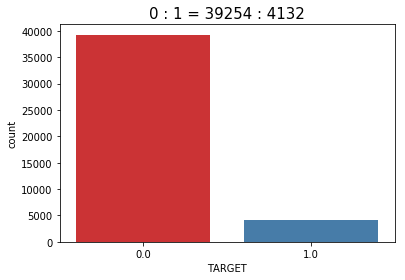

In [63]:
# 양성 클래스와 음성 클래스 갯수 확인 및 시각화
sns.countplot(y, palette='Set1')
#sns.countplot(y) 
plt.title("0 : 1 = {} : {}".format(*y.value_counts()),fontsize=15)
#plt.title("B : M = {} : {}".format(y.value_counts()[0],y.value_counts()[1]),fontsize=15)
plt.show()

In [41]:
# 학습 (80%) & 검증 (10%) & 테스트 (10%) 셋으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=2017020558)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    test_size=0.5,
                                                    stratify=y_test,
                                                    shuffle=True,
                                                    random_state=2017020558)

In [89]:
# 임의의 max_depth같도록 의사결정나무분류기 생성
clf_dt = DecisionTreeClassifier(criterion='gini',#'entropy'
                                random_state=2017020558,
                                max_depth=3,
                                min_samples_split=2,
                                min_samples_leaf=1)
# min_samples_split = the number of samples to split (ex) 15
# min_samples_leaf = the number of samples at a leat node (ex) 10
# 학습데이터로 모델 피팅
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2017020558, splitter='best')

In [90]:
# 학습, 검증 데이터 예측
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_train_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
confusion_matrix(y_train,y_train_pred)

array([[31303,    99],
       [ 3038,   268]], dtype=int64)

In [92]:
confusion_matrix(y_valid,y_valid_pred)

array([[3918,    8],
       [ 377,   36]], dtype=int64)

In [93]:
# 학습, 검증데이터 범주예측 결과 측정 지표 : 정확도
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
# 학습, 검증데이터 범주예측 결과 측정 지표 : f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

- Accuracy (Train)      : 0.9096
- Accuracy (Validation) : 0.9113
- F1 score (Train)      : 0.1459
- F1 score (Validation) : 0.1575


In [94]:
from IPython.display import Image
from graphviz import Source
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다.
#윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해주면 된다.

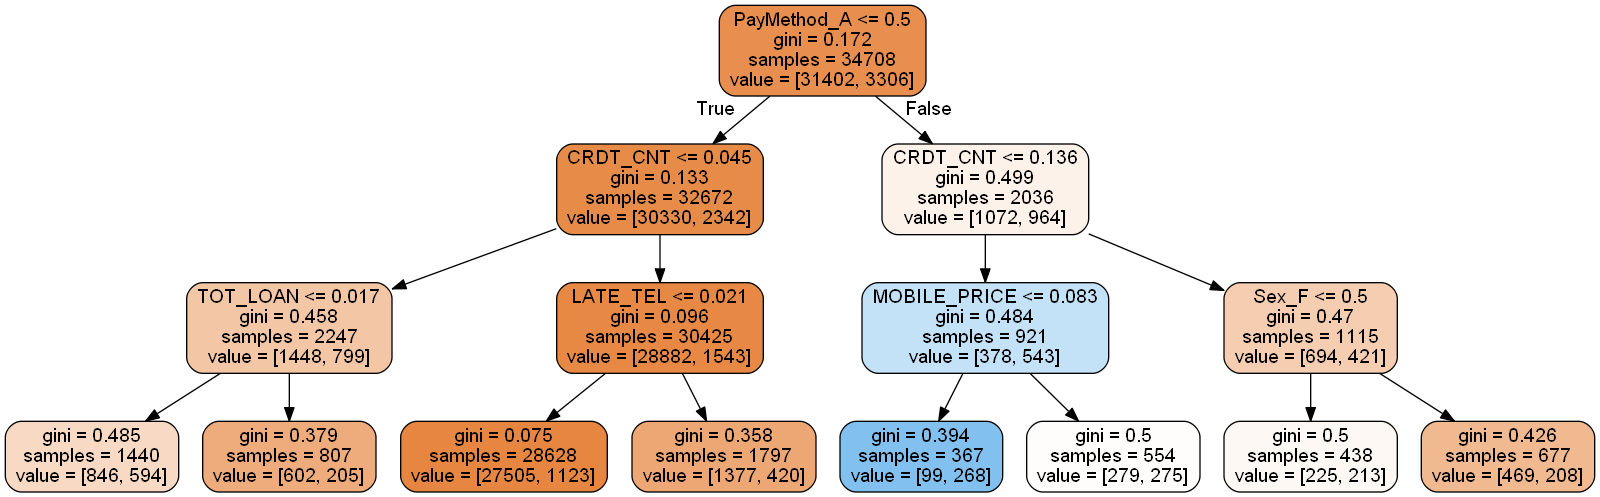

In [95]:
# export_graphviz : 의사결정나무를 DOT format으로 만들기
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               feature_names=x.columns,
                               filled=True,rounded=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))
# pruning이 안된 결과

In [72]:
# 가장 좋은 'max_depth' hyperparameter 값을 찾아보자
max_depths = list(range(1, 11, 1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=2017020558)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


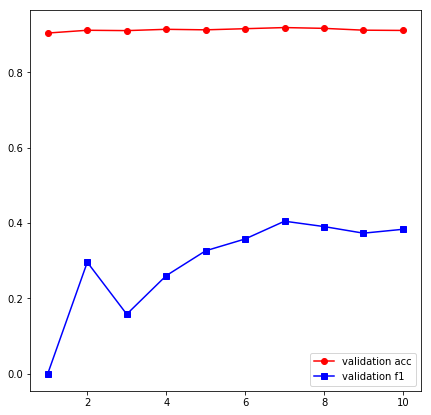

In [73]:
# 가장 좋은 'max_depth' hyperparameter 값 찾기위한 정확도, f1 그래프 그리기
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_accs, color='red', marker='o', label='validation acc')
ax.plot(max_depths, validation_f1, color='blue', marker='s', label='validation f1')
ax.legend(loc='best')
plt.show(fig)

In [74]:
best_model_idx, best_model_f1 = max(enumerate(validation_f1), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.9159
- F1 score (Test) : 0.4065


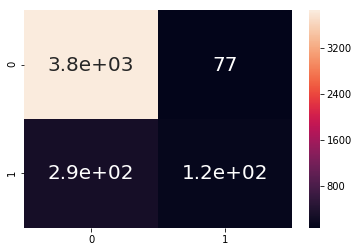

In [75]:
# Confusion matrix 그림 그려보기
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test)
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 20})

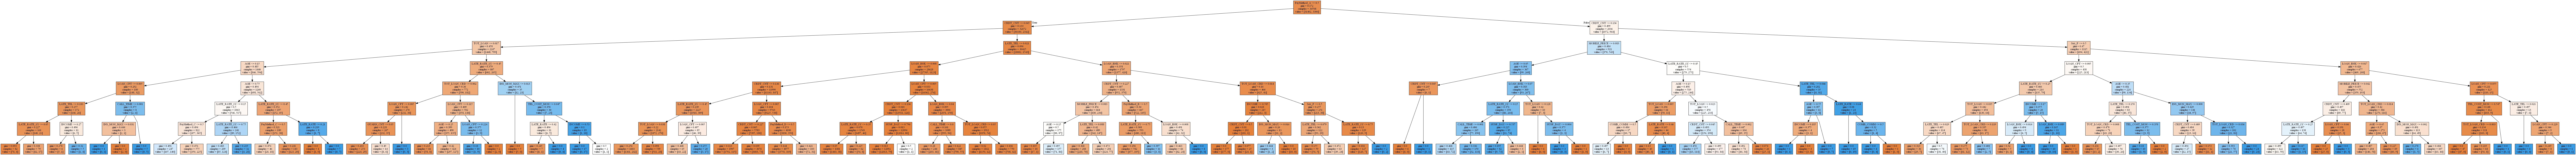

In [76]:
# Visualize the best decision tree model
graph = Source(export_graphviz(dt_models[best_model_idx],
                               out_file=None,
                               feature_names=x.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)

In [77]:
imp = dt_models[best_model_idx].feature_importances_

In [78]:
pd.DataFrame([x.columns, imp]).T

,0,1
0,AGE,0.045497
1,CALL_TIME,0.00821082
2,CANCEL_CNT_1Y,0
3,COMB_COMM,0.00182284
4,CRDT_CNT,0.268282
5,GUARN_CNT,0.00141291
6,INCOME,0.00343715
7,INS_MON_MAX,0.0101369
8,Job_A,0
9,Job_B,0


In [79]:
# 변수 중요도 확인해보기
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([x.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] != 0])

       variables  importance
19   PayMethod_A    0.334348
4       CRDT_CNT    0.268282
14      LATE_TEL   0.0820303
15      LOAN_BNK   0.0527501
13  LATE_RATE_1Y    0.051018
0            AGE    0.045497
16      LOAN_CPT   0.0365644
27      TOT_LOAN   0.0274702
18  MOBILE_PRICE   0.0217714
28  TOT_LOAN_CRD   0.0158833
24         Sex_F   0.0111253
7    INS_MON_MAX   0.0101369
1      CALL_TIME  0.00821082
21   PayMethod_C  0.00812824
22   PayMethod_D  0.00538533
26  TEL_COST_MON  0.00420936
20   PayMethod_B  0.00415921
12     LATE_RATE  0.00405131
6         INCOME  0.00343715
23      SUSP_DAY  0.00230659
3      COMB_COMM  0.00182284
5      GUARN_CNT  0.00141291


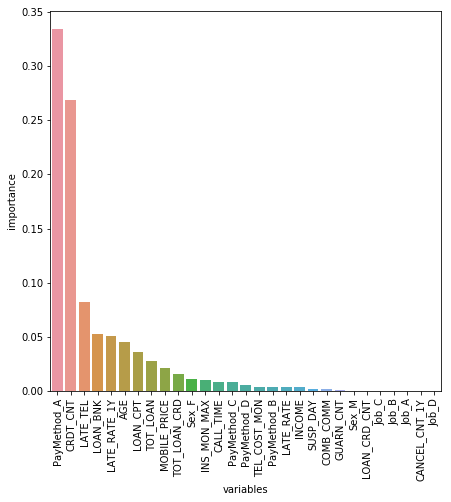

In [80]:
# 변수 중요도 그림 그리기
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90) # set property
plt.show(fig)